In [1]:
# main.py

from HybridCloud import *

PRINTLOG = False
# Devices
ibm_kawasaki = IBM_Kawasaki(env=None, name="QPU-1", printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="QPU-2", printlog = PRINTLOG)
cpu1 = CPU("CPU-1", env=None)
cpu2 = CPU("CPU-2", env=None)

# Hybrid environment
sim_env = HybridCloudSimEnv(
    qpu_devices = [ibm_kawasaki, ibm_kyiv],
    cpu_devices = [cpu1, cpu2],
    broker_class = HybridBroker,
    job_feed_method = 'dispatcher',
    file_path = 'synth_job_batches/1000-job.csv', 
    job_generation_model = None, 
    printlog = PRINTLOG, 
    cost_config = None
)

sim_env.run()

0.00: SIMULATION STARTED
1097.32: SIMULATION ENDED
Number of jobs processed: 1000


#### Simpliest Example with one QPU node and one CPU node in a hybrid cloud. 

In [2]:
# from viz import plot_all

job_records = sim_env.job_records_manager.get_job_records()
# plot_all(job_records)

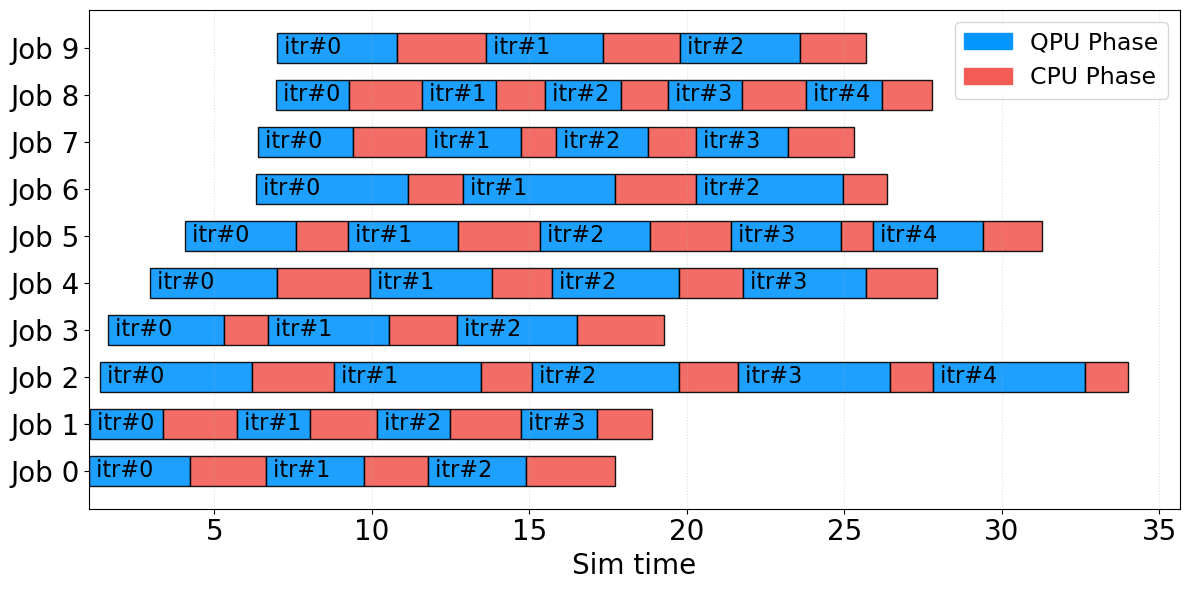

<Figure size 640x480 with 0 Axes>

In [3]:
first_ten = dict(list(job_records.items())[:10])
plot_all(first_ten, 10)
plt.savefig("results/job_phases.png", dpi=300, bbox_inches="tight")

In [4]:
results = calculate_device_usage_units(job_records, sim_env)
print(results)

{'time': 1097.32, 'qpu_util_percent': 78.12, 'cpu_util_percent': 31.81, 'mem_bw_util_percent': 45.32, 'qpu_units_time': 217745.47, 'cpu_units_time': 69807.71, 'mem_bw_time': 198925.77, 'qpu_units_capacity': 254, 'cpu_units_capacity': 200, 'mem_bw_capacity': 400}


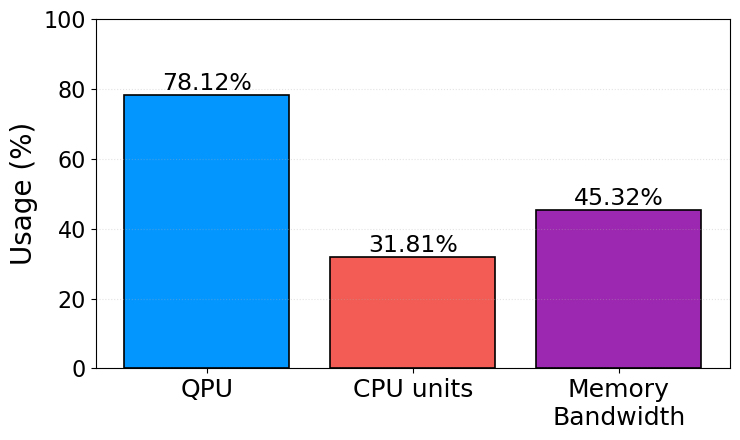

<Figure size 640x480 with 0 Axes>

In [5]:
plot_hybrid_utilization(results)
plt.savefig("results/usage.png", dpi=300, bbox_inches="tight")

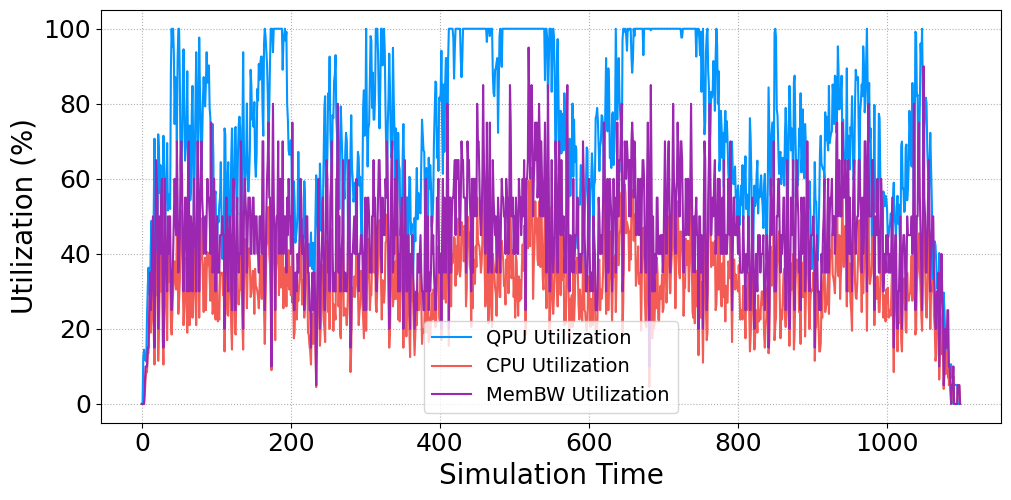

<Figure size 640x480 with 0 Axes>

In [6]:
time_points, qpu_util, cpu_util, mem_util = utilization_time_series(job_records, 256, 200, 400, step = 1.0)
plot_utilization_over_time(time_points, qpu_util, cpu_util, mem_util)
plt.savefig("results/usage_timeline.png", dpi=300, bbox_inches="tight")

In [1]:
# main.py

from HybridCloud import *

PRINTLOG = False
# Devices
ibm_kawasaki = IBM_Kawasaki(env=None, name="QPU-1", printlog = PRINTLOG)
ibm_kyiv = IBM_Kyiv(env=None, name="QPU-2", printlog = PRINTLOG)
cpu1 = CPU("CPU-1", env=None)
cpu2 = CPU("CPU-2", env=None)

cost_config = {
  "energy": {
    "electricity_price_per_kwh": 0.18,
    "default_qpu_power_kw": 50.0,
    "qpu_power_kw": {"QPU-1": 70.0, "QPU-2": 60.0},

    "cpu_power_model": "affine",
    "default_cpu_idle_kw": 0.22,
    "default_cpu_peak_kw": 0.75,
    "default_cpu_capacity_units": 16,
  }
}


# Hybrid environment
sim_env = HybridCloudSimEnv(
    qpu_devices = [ibm_kawasaki, ibm_kyiv],
    cpu_devices = [cpu1, cpu2],
    broker_class = HybridBroker,
    job_feed_method = 'dispatcher',
    file_path = 'synth_job_batches/2000-job.csv', 
    job_generation_model = None, 
    printlog = PRINTLOG, 
    cost_config=cost_config
)


print(f"cpu_power_model: {sim_env.cost_config['energy']['cpu_power_model']}")
print(f"default_cpu_idle_kw: {sim_env.cost_config['energy']['default_cpu_idle_kw']}")

sim_env.run()

cpu_power_model: affine
default_cpu_idle_kw: 0.22
0.00: SIMULATION STARTED
1929.17: SIMULATION ENDED
Number of jobs processed: 2000


In [2]:
rec = sim_env.job_records_manager.get_job_records()
for i in range(0, 2): 
    print("Job: ", i)
    print("QPU time (s):", rec[i]["qpu_time_s"])
    print("CPU time (s):", rec[i]["cpu_time_s"])
    print("Energy (kWh):", rec[i]["energy_total_kwh"])
    print("Cost ($):", rec[i]["cost_energy_total"])
    print("")

Job:  0
QPU time (s): 36.5115
CPU time (s): 8.887
Energy (kWh): 0.6465
Cost ($): 0.1164

Job:  1
QPU time (s): 27.973
CPU time (s): 10.8681
Energy (kWh): 0.5288
Cost ($): 0.0952



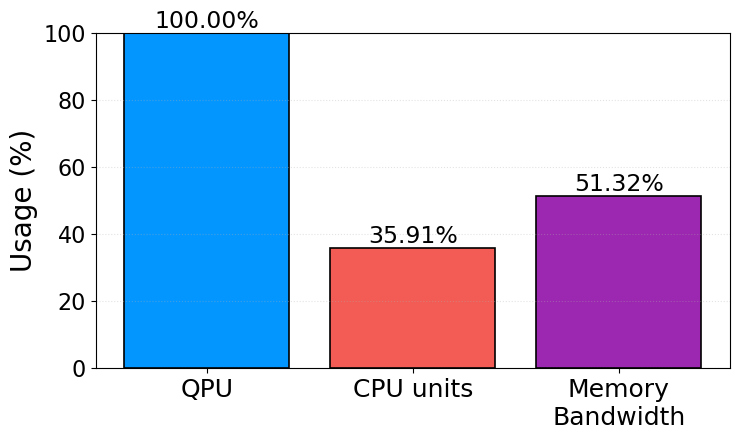

<Figure size 640x480 with 0 Axes>

In [3]:
results = calculate_device_usage_units(rec, sim_env)
plot_hybrid_utilization(results)
plt.savefig("results/new-usage.png", dpi=300, bbox_inches="tight")

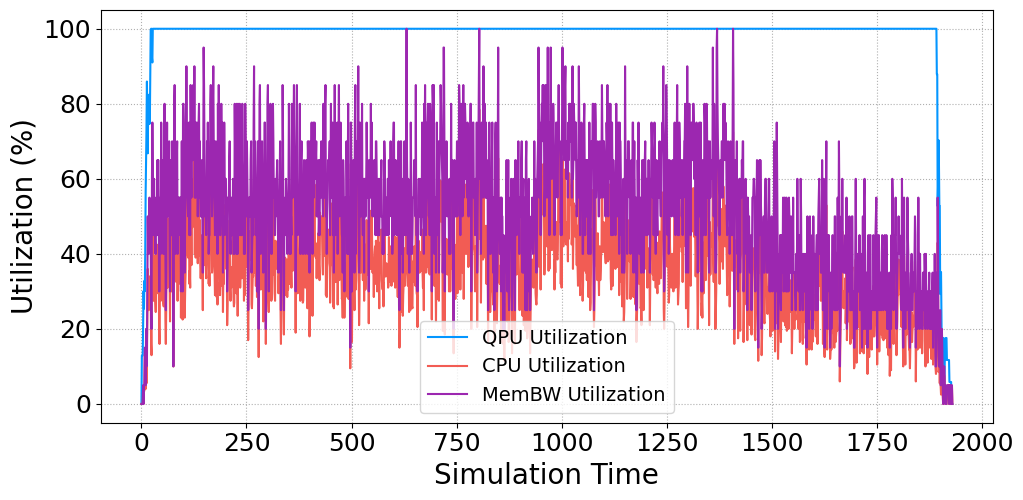

<Figure size 640x480 with 0 Axes>

In [4]:
time_points, qpu_util, cpu_util, mem_util = utilization_time_series(rec, 256, 200, 400, step = 1.0)
plot_utilization_over_time(time_points, qpu_util, cpu_util, mem_util)
plt.savefig("results/new_usage_timeline.png", dpi=300, bbox_inches="tight")

In [5]:
rec[0]

{'arrival': [0.29],
 'qpu_start': [0.2921, 8.9565, 16.6951, 26.0858, 37.0985],
 'devc_name': ['QPU-1',
  'CPU-2',
  'QPU-2',
  'CPU-1',
  'QPU-2',
  'CPU-2',
  'QPU-2',
  'CPU-2',
  'QPU-1',
  'CPU-2'],
 'qpu_arrive': [0.2921, 8.9565, 16.6951, 26.0858, 37.0985],
 'qpu_units': [11, 11, 11, 11, 11],
 'qpu_finish': [7.1312, 15.5676, 24.3062, 34.6969, 43.9376],
 'qpu_wait': [0.0, 0.0, 0.0, 0.0, 0.0],
 'qpu_svc': [6.8391, 6.6111, 7.6111, 8.6111, 6.8391],
 'qpu_turn': [6.8391, 6.6111, 7.6111, 8.6111, 6.8391],
 'cpu_start': [7.1312, 15.5676, 24.3062, 34.6969, 43.9376],
 'cpu_arrive': [7.1312, 15.5676, 24.3062, 34.6969, 43.9376],
 'cpu_units': [9, 10, 6, 8, 8],
 'cpu_mem_bw': [20, 20, 20, 20, 20],
 'cpu_finish': [8.9565, 16.6951, 26.0858, 37.0985, 45.6906],
 'cpu_wait': [0.0, 0.0, 0.0, 0.0, 0.0],
 'cpu_svc': [1.8253, 1.1275, 1.7796, 2.4016, 1.753],
 'cpu_turn': [1.8253, 1.1275, 1.7796, 2.4016, 1.753],
 'makespan': [45.4006],
 'qpu_time_s': 36.5115,
 'cpu_time_s': 8.887,
 'energy_qpu_kwh': 0.64